# Info/CS 4300: Language and Information

## SVD CLASS DEMO RECREATION FOR ROCKTAILS


In [1]:
from __future__ import print_function
import numpy as np
import json

## Load the data

In [159]:
drinkByName = dict()

with open('../app/static/drinks.json', 'r') as infile:  
    jsonData = json.load(infile)
    drinklst = jsonData['drinks']
    for drink in drinklst:
        drink['ingredients'] = ' '.join(drink['ingredients'])
        drink['categories'] = ' '.join(drink['categories'])
#         drink['reviews'] = ' '.join(drink['reviews'])
    documents = [
        (x['name'],
         x['categories'],
         x['ingredients'])
                for x in drinklst]
    np.random.shuffle(documents)

In [160]:

print("Loaded {} documents".format(len(documents)))
print("Here is one of them:")
print(documents[0])


Loaded 2131 documents
Here is one of them:
('Blood and Sand', 'halloween', '1/2 oz  Blended Scotch Whiskey 1/2 oz  cherry-flavored brandy 1/2 oz  Sweet Vermouth 1/2 oz  Orange juice')


In [182]:
from sklearn.feature_extraction.text import TfidfVectorizer


In [162]:
vectorizer = TfidfVectorizer(stop_words = 'english', max_df = .7,
                            min_df = 75)
my_matrix = vectorizer.fit_transform([x[2] for x in documents]).transpose()

/Users/nate/Downloads/assignment5/venv/lib/python3.5/site-packages/sklearn/feature_extraction/text.py:1039: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if hasattr(X, 'dtype') and np.issubdtype(X.dtype, np.float):


In [163]:
print(type(my_matrix))
print(my_matrix.shape)

<class 'scipy.sparse.csc.csc_matrix'>
(68, 2131)


In [164]:
from scipy.sparse.linalg import svds
u, s, v_trans = svds(my_matrix, k=50)

In [165]:

print(u.shape)
print(s.shape)
print(v_trans.shape)

(68, 50)
(50,)
(50, 2131)


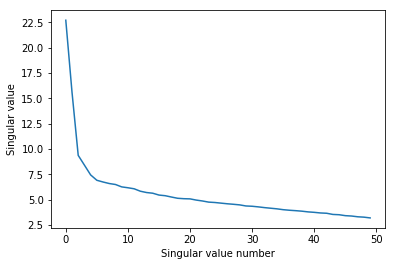

In [166]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(s[::-1])
plt.xlabel("Singular value number")
plt.ylabel("Singular value")
plt.show()

In [167]:
words_compressed, _, docs_compressed = svds(my_matrix, k=40)
docs_compressed = docs_compressed.transpose()

In [168]:
print(words_compressed.shape)
print(docs_compressed.shape)

(68, 40)
(2131, 40)


In [169]:
word_to_index = vectorizer.vocabulary_
index_to_word = {i:t for t,i in word_to_index.items()}
print(words_compressed.shape)

(68, 40)


In [170]:
#row normalize
from sklearn.preprocessing import normalize
words_compressed = normalize(words_compressed, axis = 1)

In [171]:
def closest_words(word_in, k = 10):
    if word_in not in word_to_index: return "Not in vocab."
    sims = words_compressed.dot(words_compressed[word_to_index[word_in],:])
    asort = np.argsort(-sims)[:k+1]
    return [(index_to_word[i],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [172]:
closest_words("vodka")


[('wedge', 0.24348682260133975),
 ('cranberry', 0.11854932813007653),
 ('vanilla', 0.09866259446295962),
 ('cherry', 0.08556091009106377),
 ('grenadine', 0.06472720871002824),
 ('oz', 0.05543908897597367),
 ('twist', 0.05188622730616699),
 ('flavored', 0.04676972355969156),
 ('creme', 0.041184916691738925),
 ('ounce', 0.03263526689389111)]

In [173]:
print(list(word_to_index))

['lime', 'dark', 'frozen', 'light', 'bitters', 'angostura', 'cranberry', 'tablespoons', 'schnapps', 'old', 'cream', 'sugar', 'grenadine', 'ice', 'juice', 'syrup', 'fluid', 'amaretto', 'coconut', 'dry', 'flavored', 'whiskey', 'sec', 'boston', 'cup', 'apple', 'cherry', 'creme', 'cups', 'gin', 'tequila', 'white', 'teaspoon', 'pineapple', 'orange', 'ounce', 'fresh', 'rum', 'vodka', 'ounces', 'ginger', 'simple', 'oz', 'liqueur', 'milk', 'vermouth', 'triple', 'cubes', 'lemon', 'jigger', 'powdered', 'wedge', 'tablespoon', 'bourbon', 'mr', 'twist', 'sweet', '12', 'vanilla', 'egg', 'tsp', 'water', 'coffee', 'salt', 'brandy', 'ground', 'soda', 'maraschino']


In [174]:
from sklearn.manifold import TSNE
tsne = TSNE(verbose=1)

In [175]:
print(docs_compressed.shape)
#we'll just take the first 5K documents, because TSNE is memory intensive!
subset = docs_compressed[:5000,:]
projected_docs = tsne.fit_transform(subset)
print(projected_docs.shape)

(2131, 40)
[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 2131
[t-SNE] Computed conditional probabilities for sample 2000 / 2131
[t-SNE] Computed conditional probabilities for sample 2131 / 2131
[t-SNE] Mean sigma: 0.050870
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.253561
[t-SNE] Error after 250 iterations: 1.253561
(2131, 2)


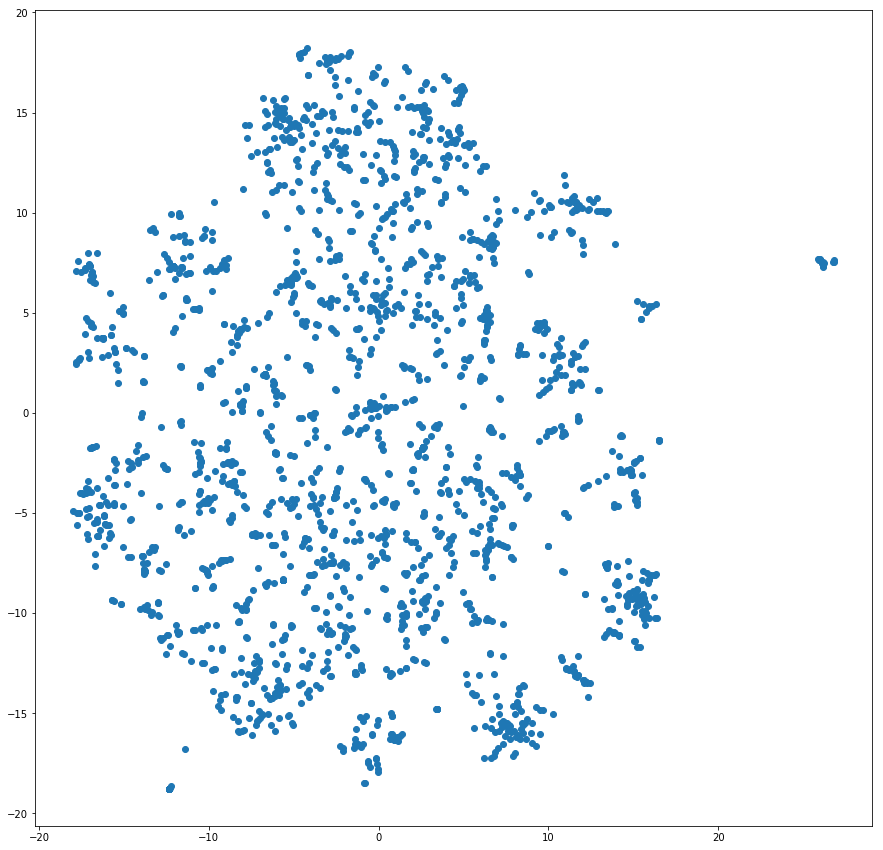

In [176]:
plt.figure(figsize=(15,15))
plt.scatter(projected_docs[:,0],projected_docs[:,1])
plt.show()

In [184]:
from collections import Counter
t = [x[1] for x in documents]
cats = Counter(t)
print(cats)

Counter({'': 1664, 'winter': 64, 'afternoon': 32, 'night': 26, 'easter': 25, 'summer': 19, 'morning': 19, 'spring': 16, 'fall thanksgiving': 15, 'dinner party graduation': 14, 'st pattys': 13, 'winter st pattys': 13, 'halloween': 11, 'thanksgiving': 11, 'spring summer': 9, 'winter christmas': 9, 'fall': 9, 'dinner party': 8, 'winter morning': 8, 'party sports': 8, 'winter birthday': 8, 'morning graduation new years birthday': 7, 'winter thanksgiving': 7, 'spring morning': 6, 'birthday': 5, 'winter night': 5, 'spring sports': 4, 'spring summer afternoon': 4, 'sports': 4, 'spring afternoon': 3, 'graduation': 3, 'winter birthday christmas': 3, 'morning afternoon': 3, 'party': 3, 'spring easter': 2, 'spring summer sports': 2, 'winter halloween': 2, 'fall winter': 2, 'morning graduation new years': 2, 'summer afternoon': 2, 'night easter': 2, 'afternoon party new years': 2, 'afternoon sports': 2, 'graduation new years birthday': 2, 'winter easter': 2, 'morning afternoon graduation': 2, 'spr

In [185]:
from collections import defaultdict
cat_to_color = defaultdict(lambda: 'k')
cat_to_color.update({"winter":'g',
               "spring":'c',
               "summer":'r',
               "fall": "b"})
color_to_project = defaultdict(list)
for i in range(projected_docs.shape[0]):
    color_to_project[cat_to_color[''.join(documents[i][1])]].append(i)

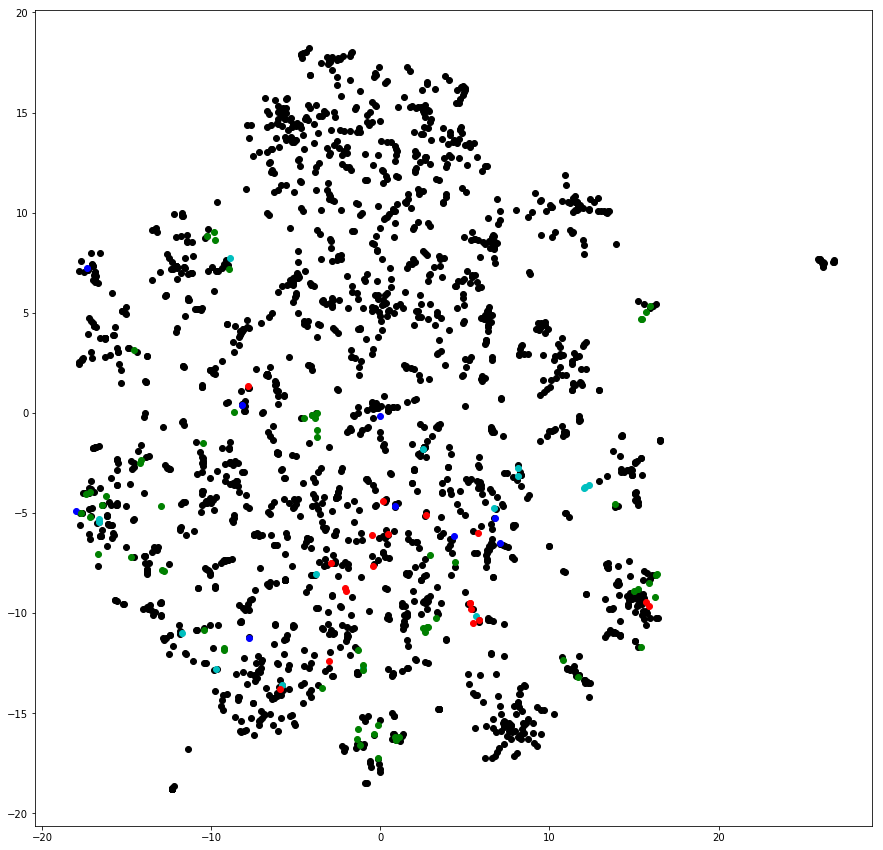

In [186]:
plt.figure(figsize=(15,15))
for color, indices in color_to_project.items():
    indices = np.array(indices)
    plt.scatter(projected_docs[indices,0], projected_docs[indices,1],
                color = color)
plt.show()

In [187]:
docs_compressed = normalize(docs_compressed, axis = 1)
def closest_projects(project_index_in, k = 5):
    sims = docs_compressed.dot(docs_compressed[project_index_in,:])
    asort = np.argsort(-sims)[:k+1]
    return [(documents[i][0],sims[i]/sims[asort[0]]) for i in asort[1:]]

In [188]:
for i in range(100):
    print(documents[i][0])
    for title, score in closest_projects(i):
        print("{}:{:.3f}".format(title[:40], score))
    print()

Blood and Sand
Irish Spring:0.864
Texas Rattlesnake:0.709
Fratelli Cocktail:0.681
Aquarius:0.678
Stone Sour:0.677

Savannah
Creme de Gin Cocktail:0.958
Poppy Cocktail:0.742
Virgin:0.737
Suissesse Cocktail:0.710
Dolores:0.709

Beer Buster
Beer Buster:1.000
Kool-Aid Slammer:1.000
Frisky Witch:1.000
Dreamy Dorini Smoking Martini:0.980
Champagne Flamingo:0.980

Green Dragon Cocktail
Green Opal Cocktail:0.948
Barbary Coast Cocktail:0.940
K.C.B. Cocktail:0.937
Fallen Angel Cocktail:0.933
Vodka Grasshopper Cocktail:0.922

Mimosa
Mimosa:1.000
Bucks Fizz (Mimosa):1.000
Mudslinger:0.967
Berry Deadly:0.967
Holloween Punch:0.967

Pacific Sunshine
Tequila Sour:0.755
Oldest Temptation:0.754
Champs Elysees Cocktail:0.754
High Plains Drifter No. 1:0.749
Tequila Old-Fashioned:0.731

Porto flip
Baltimore Bracer:0.870
Pousse L'Amour:0.744
Kiss the Boys Goodbye:0.743
Grapefruit Nog:0.720
Sol Y Sombra:0.627

The Cinquecento
Pickled Pink:0.879
Bravo:0.755
El Profesor:0.731
Sargasso:0.720
L'italienne:0.719



In [11]:

print(documents[0])

('Apple Pie Cocktail', ['fall', 'thanksgiving'], 'Shake with ice and strain into cocktail glass. ', [])
